In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df = pd.read_csv("/Users/jacobemerson/code/cgallin/cover_genie/raw_data/job_data/postings.csv")
map = pd.read_csv("/Users/jacobemerson/code/cgallin/cover_genie/raw_data/job_data/mappings/industries.csv")
industries = pd.read_csv("/Users/jacobemerson/code/cgallin/cover_genie/raw_data/job_data/jobs/job_industries.csv")

In [10]:
# Create a reverse mapping from industry names to their corresponding keys
reverse_industry_map = {industry: key for key, industries in industry_map.items() for industry in industries}
reverse_industry_map["nan"]
# Replace the values in map.industry_name with their corresponding keys
map["industry_name"]=map['industry_name'].map(lambda x : reverse_industry_map[x] if x in reverse_industry_map.keys() else x)


NameError: name 'industry_map' is not defined

In [ ]:
df = df.merge(industries.merge(map,how="left", on ="industry_id").set_index("industry_id"),how="left", on ="job_id")

In [ ]:
df["industry_name"].isnull().sum()

1536

<AxesSubplot:>

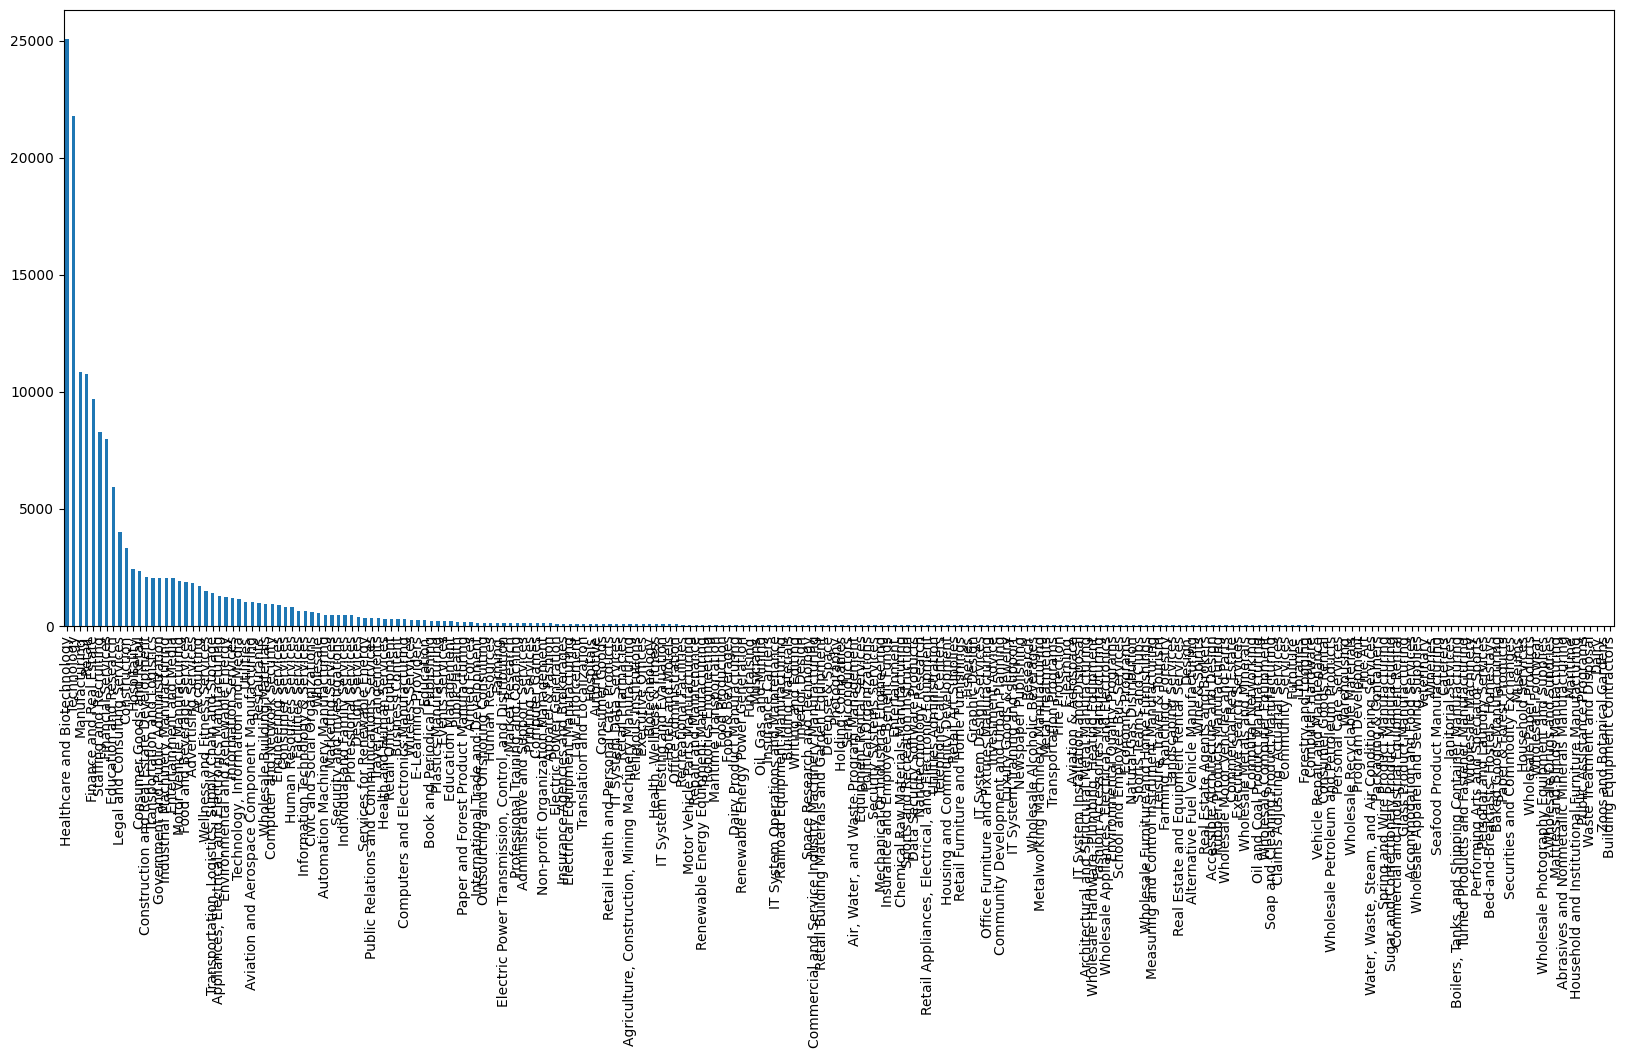

In [ ]:
fig = plt.figure(figsize=(20,8))
df.industry_name.value_counts().plot(kind="bar")


In [ ]:
df.industry_name.value_counts(ascending=False)[:100]

Hospitals and Health Care                                 22197
Tech                                                      17541
Manufacturing                                             15698
Retail                                                    12064
Staffing and Recruiting                                    8261
Financial Services                                         7964
Hospitality                                                5237
Banking                                                    4224
Construction                                               3305
Education                                                  2830
Insurance                                                  2576
Real Estate                                                2313
Energy and Natural Resources                               2160
Telecommunications                                         2074
Non-profit Organizations                                   2033
Biotechnology Research                  

In [ ]:
df["industry_name"] =df.industry_name.replace({
    "Food and Beverage Services": "Hospitality",
    "Restaurants": "Hospitality",
    "Chemical Manufacturing" : "Manufacturing",
    "Oil and Gas" : "Energy and Natural Resources",
    "Utilities" : "Energy and Natural Resources",
    "Industrial Machinery Manufacturing" : "Manufacturing",
    "Medical Equipment Manufacturing" : "Manufacturing",
    "Defense and Space Manufacturing": "Manufacturing",
    "Motor Vehicle Manufacturing" : "Manufacturing",
    "Appliances, Electrical, and Electronics Manufacturing":"Manufacturing",
    "Aviation and Aerospace Component Manufacturing": "Manufacturing",
    "Machinery Manufacturing" : "Manufacturing",
    "Higher Education": "Education",
    "Education Administration Programs":"Education",
    "Food and Beverage Manufacturing" : "Manufacturing",
    "Medical Practices" : "Hospitals and Health Care",
    "Pharmaceutical Manufacturing" : "Hospitals and Health Care",
    "Technology, Information and Internet" : "Tech",
    "IT Services and IT Consulting" : "Tech",
    "Technology, Information and Media" :"Tech",
    "Retail Apparel and Fashion" : "Retail",
    "Mental Health Care": "Hospitals and Health Care",
    "Software Development": "Tech",
    "Truck Transportation": "Transportation, Logistics, Supply Chain and Storage",
    "Investment Banking":"Banking",
    "Investment Management":"Banking"




}
)
df.industry_name.value_counts().shape

(364,)

In [ ]:
df[["industry_name"]].value_counts()[df[["industry_name"]]].shape

(265,)

In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:
list(map.industry_name[:40])

['Defense and Space Manufacturing',
 'Computer Hardware Manufacturing',
 'Software Development',
 'Computer Networking Products',
 'Technology, Information and Internet',
 'Semiconductor Manufacturing',
 'Telecommunications',
 'Law Practice',
 'Legal Services',
 'Business Consulting and Services',
 'Biotechnology Research',
 'Medical Practices',
 'Hospitals and Health Care',
 'Pharmaceutical Manufacturing',
 'Veterinary Services',
 'Medical Equipment Manufacturing',
 'Personal Care Product Manufacturing',
 'Retail Apparel and Fashion',
 'Sporting Goods Manufacturing',
 'Tobacco Manufacturing',
 'Retail Groceries',
 'Food and Beverage Manufacturing',
 'Computers and Electronics Manufacturing',
 'Manufacturing',
 'Furniture and Home Furnishings Manufacturing',
 'Retail',
 'Entertainment Providers',
 'Gambling Facilities and Casinos',
 'Travel Arrangements',
 'Hospitality',
 'Restaurants',
 'Spectator Sports',
 'Food and Beverage Services',
 'Movies, Videos, and Sound',
 'Broadcast Media 

In [ ]:
industry_map = {
    "Technology": [
        "Software Development", "Computer Hardware", "Computer Networking",
        "IT Services and IT Consulting", "Data Infrastructure and Analytics",
        "Blockchain Services", "Internet Marketplace Platforms",
        "Technology, Information and Internet", "Telecommunications",
        "Semiconductors", "Computer Games", "Renewable Energy Semiconductor Manufacturing",
        "Digital Accessibility Services", "Business Intelligence Platforms",
        "Social Networking Platforms", "IT System Design Services",
        "IT System Custom Software Development", "Desktop Computing Software Products",
        "Data Security Software Products", "Internet News", "Internet Publishing",
    ],
    "Manufacturing": [
        "Defense and Space Manufacturing", "Medical Equipment Manufacturing",
        "Consumer Electronics", "Textile Manufacturing", "Apparel Manufacturing",
        "Furniture", "Beverage Manufacturing", "Pharmaceutical Manufacturing",
        "Automotive", "Machinery Manufacturing", "Industrial Automation",
        "Plastics and Rubber Product Manufacturing", "Metal Valve, Ball, and Roller Manufacturing",
        "Climate Technology Product Manufacturing", "Robot Manufacturing",
        "Aviation and Aerospace Component Manufacturing", "Chemical Manufacturing",
        "Renewable Energy Equipment Manufacturing", "Food Production",
    ],
    "Healthcare and Biotechnology": [
        "Biotechnology", "Veterinary", "Medical Device", "Health, Wellness & Fitness",
        "Hospitals and Health Care", "Medical Practices", "Dentists",
        "Mental Health Care", "Alternative Medicine", "Physical, Occupational and Speech Therapists",
        "Medical and Diagnostic Laboratories", "Nursing Homes and Residential Care Facilities",
    ],
    "Legal and Consulting Services": [
        "Law Practice", "Legal Services", "Business Consulting and Services",
        "Government Relations Services", "Public Policy Offices", "Operations Consulting",
        "Alternative Dispute Resolution", "Environmental Services",
    ],
    "Finance and Real Estate": [
        "Banking", "Insurance", "Financial Services", "Capital Markets",
        "Investment Banking", "Investment Management", "Venture Capital and Private Equity Principals",
        "Real Estate", "Commercial Real Estate", "Leasing Non-residential Real Estate",
        "Mortgage Services", "Pension Funds",
    ],
    "Consumer Goods and Retail": [
        "Retail Apparel and Fashion", "Retail Groceries", "Retail Luxury Goods and Jewelry",
        "Online and Mail Order Retail", "Retail Motor Vehicles", "Retail Health and Personal Care Products",
        "Retail Office Supplies and Gifts", "Retail Recyclable Materials & Used Merchandise",
        "Food and Beverage Retail", "Furniture and Home Furnishings Manufacturing",
        "Wholesale", "Wholesale Import and Export",
    ],
    "Entertainment and Media": [
        "Entertainment", "Performing Arts", "Gambling Facilities and Casinos",
        "Movies, Videos, and Sound", "Broadcast Media Production and Distribution",
        "Museums", "Zoos and Botanical Gardens", "Spectator Sports", "Golf Courses and Country Clubs",
        "Amusement Parks and Arcades", "Artists and Writers", "Animation and Post-production",
        "Media Production", "Online Media",
    ],
    "Transportation and Logistics": [
        "Freight and Package Transportation", "Airlines and Aviation", "Maritime Transportation",
        "Truck Transportation", "Rail Transportation", "Urban Transit Services",
        "Transportation/Trucking/Railroad", "Warehousing and Storage",
    ],
    "Education and Research": [
        "Primary and Secondary Education", "Higher Education", "Education Management",
        "Technical and Vocational Training", "E-Learning Providers", "Non-profit Organizations",
        "Research Services", "Think Tanks", "Philanthropic Fundraising Services",
    ],
    "Government and Public Administration": [
        "Government Administration", "Public Safety", "Legislative Offices",
        "International Affairs", "Military and International Affairs",
        "Public Policy Offices", "Courts of Law", "Correctional Institutions",
        "Housing Programs", "Transportation Programs", "Utilities Administration",
    ],
    "Environmental and Renewable Energy": [
        "Environmental Services", "Renewables & Environment", "Solar Electric Power Generation",
        "Wind Electric Power Generation", "Renewable Energy Power Generation",
        "Climate Data and Analytics", "Conservation Programs", "Horticulture",
    ],
    "Construction and Real Estate Development": [
        "Building Construction", "Residential Building Construction", "Nonresidential Building Construction",
        "Utility System Construction", "Specialty Trade Contractors", "Architecture and Planning",
        "Civil Engineering", "Surveying and Mapping Services",
    ],
}

In [ ]:
industry_map = {
    "Technology": [
        "Defense and Space Manufacturing", "Computer Hardware Manufacturing",
        "Software Development", "Computer Networking Products",
        "Technology, Information and Internet", "Semiconductor Manufacturing",
        "Telecommunications", "IT Services and IT Consulting",
        "Internet Marketplace Platforms", "Blockchain Services",
        "Desktop Computing Software Products", "IT System Custom Software Development",
        "Data Infrastructure and Analytics", "Social Networking Platforms",
        "Business Intelligence Platforms", "Digital Accessibility Services",
        "Communications Equipment Manufacturing", "Audio and Video Equipment Manufacturing",
        "Magnetic and Optical Media Manufacturing", "Renewable Energy Semiconductor Manufacturing",
        "Internet News", "Internet Publishing",
    ],
    "Manufacturing": [
        "Consumer Electronics", "Medical Equipment Manufacturing",
        "Apparel Manufacturing", "Footwear Manufacturing",
        "Textile Manufacturing", "Furniture and Home Furnishings Manufacturing",
        "Beverage Manufacturing", "Pharmaceutical Manufacturing",
        "Sporting Goods Manufacturing", "Tobacco Manufacturing",
        "Plastics and Rubber Product Manufacturing", "Packaging and Containers Manufacturing",
        "Glass, Ceramics and Concrete Manufacturing", "Metal Valve, Ball, and Roller Manufacturing",
        "Robot Manufacturing", "Industrial Automation",
        "Transportation Equipment Manufacturing", "Oil and Gas",
        "Shipbuilding", "Chemical Manufacturing", "Mining",
        "Agricultural Chemical Manufacturing", "Paint, Coating, and Adhesive Manufacturing",
        "Electric Lighting Equipment Manufacturing", "Meat Products Manufacturing",
        "Wood Product Manufacturing", "Food and Beverage Manufacturing",
        "Machinery Manufacturing", "Construction Hardware Manufacturing",
        "Primary Metal Manufacturing", "Fabricated Metal Products",
        "HVAC and Refrigeration Equipment Manufacturing",
        "Engines and Power Transmission Equipment Manufacturing",
    ],
    "Healthcare and Biotechnology": [
        "Medical Practices", "Hospitals and Health Care",
        "Biotechnology Research", "Mental Health Care",
        "Medical Device", "Veterinary Services", "Nursing Homes and Residential Care Facilities",
        "Animal Feed Manufacturing", "Physical, Occupational and Speech Therapists",
        "Alternative Medicine", "Personal Care Product Manufacturing",
        "Cosmetics", "Pharmaceutical Manufacturing", "Dentists",
        "Medical and Diagnostic Laboratories", "Home Health Care Services",
    ],
    "Legal and Consulting Services": [
        "Law Practice", "Legal Services", "Business Consulting and Services",
        "Government Relations Services", "Strategic Management Services",
        "Alternative Dispute Resolution", "Public Policy Offices",
        "Environmental Services", "Operations Consulting",
    ],
    "Finance and Real Estate": [
        "Banking", "Insurance", "Real Estate", "Leasing Non-residential Real Estate",
        "Investment Banking", "Investment Management", "Capital Markets",
        "Venture Capital and Private Equity Principals", "Mortgage Services",
        "Credit Intermediation", "Loan Brokers", "Pension Funds",
        "Funds and Trusts", "Trusts and Estates",
    ],
    "Consumer Goods and Retail": [
        "Retail Apparel and Fashion", "Retail Groceries", "Retail Luxury Goods and Jewelry",
        "Online and Mail Order Retail", "Retail Motor Vehicles", "Retail Office Supplies and Gifts",
        "Retail Recyclable Materials & Used Merchandise", "Food and Beverage Retail",
        "Sporting Goods Manufacturing", "Retail Musical Instruments",
        "Retail Books and Printed News", "Retail Florists", "Tobacco Manufacturing",
        "Wholesale Import and Export", "Wholesale Luxury Goods and Jewelry",
        "Wholesale Food and Beverage", "Wholesale Chemical and Allied Products",
        "Wholesale Raw Farm Products",
    ],
    "Entertainment and Media": [
        "Entertainment Providers", "Movies, Videos, and Sound",
        "Broadcast Media Production and Distribution", "Performing Arts",
        "Gambling Facilities and Casinos", "Artists and Writers", "Online Audio and Video Media",
        "Museums, Historical Sites, and Zoos", "Spectator Sports",
        "Golf Courses and Country Clubs", "Amusement Parks and Arcades",
        "Animation and Post-production", "Media Production", "Online Media",
        "Writers and Editors", "Theater Companies",
    ],
    "Transportation and Logistics": [
        "Freight and Package Transportation", "Truck Transportation",
        "Rail Transportation", "Airlines and Aviation", "Urban Transit Services",
        "Transportation/Trucking/Railroad", "Pipeline Transportation",
        "Warehousing and Storage", "Ground Passenger Transportation",
    ],
    "Education and Research": [
        "Primary and Secondary Education", "Higher Education",
        "Education Administration Programs", "Research Services",
        "Think Tanks", "Technical and Vocational Training",
        "Non-profit Organizations", "Philanthropic Fundraising Services",
    ],
    "Government and Public Administration": [
        "Government Administration", "Public Safety", "Legislative Offices",
        "International Affairs", "Military and International Affairs",
        "Administration of Justice", "Public Policy Offices",
        "Courts of Law", "Correctional Institutions", "Housing Programs",
    ],
    "Environmental and Renewable Energy": [
        "Environmental Services", "Horticulture", "Renewables & Environment",
        "Solar Electric Power Generation", "Climate Data and Analytics",
        "Wind Electric Power Generation", "Climate Technology Product Manufacturing",
        "Conservation Programs",
    ],
    "Construction and Real Estate Development": [
        "Building Construction", "Residential Building Construction",
        "Nonresidential Building Construction", "Utility System Construction",
        "Specialty Trade Contractors", "Architecture and Planning",
        "Surveying and Mapping Services", "Civil Engineering",
    ],
    "Ambiguous or Placeholder Entries": [
        "nan", "Programs", "Non-descriptive placeholders from the list"
    ]
}

In [ ]:
list=industry_map.values()

In [ ]:
def flatten(xss):
    return [x for xs in xss for x in xs]


In [ ]:
len(flatten(list))

174